In [22]:
#import libraries

import numpy as np
import torch
import torch.nn as nn

import matplotlib.pyplot as plt

# Create a transpose convoultion instance

In [23]:
#create a ConvTranseposed2d class instance with parameters

#parameters
in_chanels = 3 #RGB
out_chans = 15
krn_sz =5 #should be an odd numebr
stride = 1
padding = 0

#create a instacne
c = nn.ConvTranspose2d(in_channels=in_chanels, out_channels=out_chans,kernel_size=krn_sz,stride=stride,padding=padding)

#let's have a look at it
print(c)
print(' ')

#check out the weight tensor
print("Size of weights: " + str(c.weight.shape))
print("Size of bias: " + str(c.bias.shape))

ConvTranspose2d(3, 15, kernel_size=(5, 5), stride=(1, 1))
 
Size of weights: torch.Size([3, 15, 5, 5])
Size of bias: torch.Size([15])


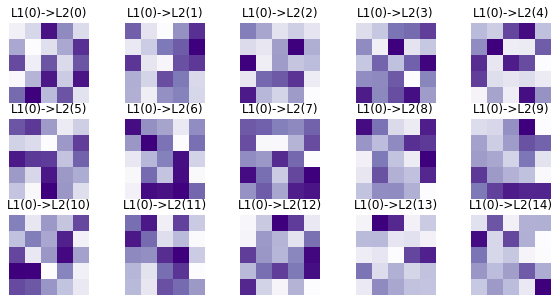

In [24]:
#what do the kernels look like

fig,ax = plt.subplots(3,5,figsize=(10,5))

for i ,ax in enumerate(ax.flatten()):
    ax.imshow(torch.squeeze(c.weight[0,i,:,:]).detach(),cmap="Purples")
    ax.set_title("L1(0)->L2(%s)"%i)
    ax.axis("off")

# Convovle with an image

torch.Size([1, 3, 64, 64])
(64, 64, 3, 1)


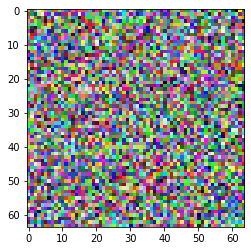

In [25]:
#size of the image(N,RGB,width,height)
imsize = (1,3,64,64)

img = torch.rand(imsize)

#pytorch wants channels first, but matplotlib wants channels last.
#therefore, tensors must be permuted to visualize

img2view = img.permute(2,3,1,0).numpy()
print(img.shape)
print(img2view.shape)
plt.imshow(np.squeeze(img2view))

In [26]:
#convolve the image with the flicker bank(set of 'outchans' kernels)

convres = c(img)

print(img.shape)
print(convres.shape)

torch.Size([1, 3, 64, 64])
torch.Size([1, 15, 68, 68])


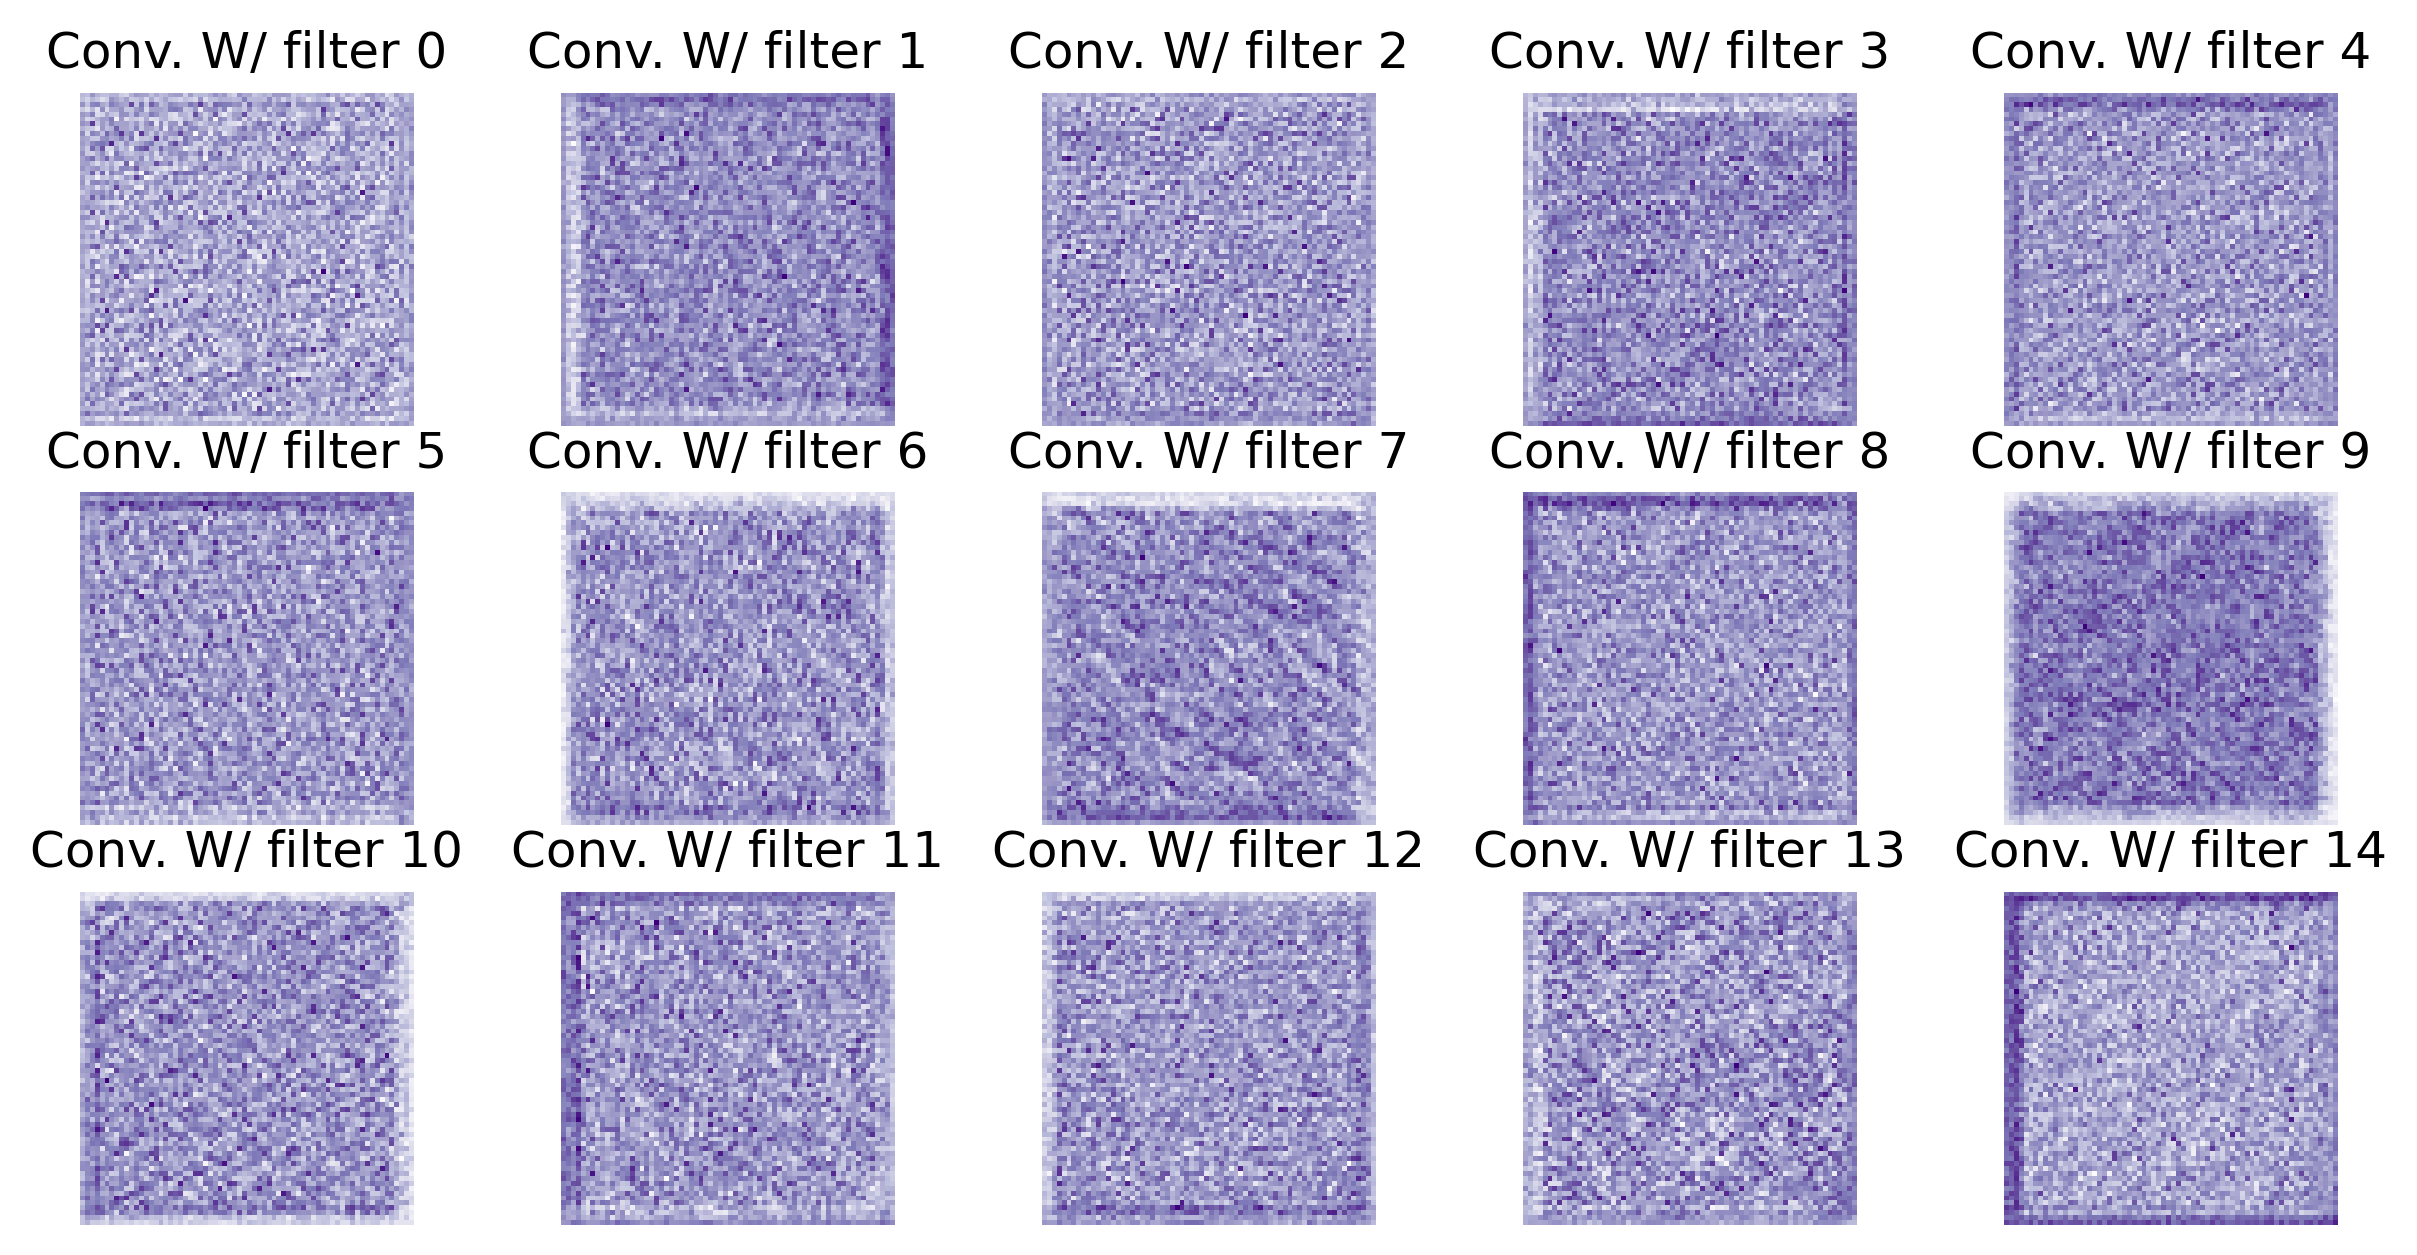

In [27]:
# inspecting convolved picture

fig,ax = plt.subplots(3,5,figsize = (10,5),dpi=300)

for i,ax in enumerate(ax.flatten()):
    #extract the "layer" og teh convolution result
    I = torch.squeeze(convres[0,i,:,:]).detach()


    #and visualize it
    ax.imshow(I,cmap='Purples')
    ax.set_title('Conv. W/ filter %s'%i)
    ax.axis("Off")

plt.tight_layout
plt.show()